# Exercise 7.1

In the MD/MC code we have provided, include tail corrections for potential energy, 𝑈, and pressure 𝑃.

As we have seen, the tail corrections for the potential energy and pressure account for the neglegted contributions in the spherical cutoff approximation. Assuming that $g(r)\simeq1$ for $r>r_{cut}$ we can find:

$$ \frac{\left<V_{LJ}\right>_{tail}}{N} = \frac{8\pi\rho_{LJ}\epsilon}{9r_{c}^{9}}-\frac{8\pi\rho_{LJ}\epsilon}{3r_{c}^{3}}$$

$$ \frac{\left<P_{LJ}\right>_{tail}}{3N\epsilon} = 32\pi\rho_{LJ}\left[\frac{1}{9r_{c}^{9}}-\frac{1}{6r_{c}^{3}}\right]$$

which can be converted into natural units. Therefore, i simply add in my code:

```c++
//tail corrections
vtail = (8 * M_PI * rho) * ((1 / (9 * pow(rcut, 9))) - (1 / (3 * pow(rcut, 3))));
ptail = (32 * M_PI * rho) * ((1 / (9 * pow(rcut, 9))) - (1 / (6 * pow(rcut, 3))));
```

And i add them to the final measured values

# Exercise 7.2

## Assignment

Use the MD/MC code to print out instantaneous values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)


## Simulation

Empirically, I observed that after $10^4$ MC steps the system is properly equilibrated in every of the three possible phases. The following plots show the instant values of potential energy per particle $U/N$ along the equilibrated simulations of $5\cdot10^5$ MC steps. In order to achieve the proper acceptance ratio of $50\%$ I used the following moving parameters:

- Gas phase : $\sigma$ = 20
- Liquid phase: $\sigma$ = 0.2
- Solid phase: $\sigma$ = 0.12

Note that in the Gas phase, despite the large \sigma used during the simulation, the acceptance ratio has been slightly higher than the target $50\%$ threshold. For visualization purposes, only the first 500 data are shown.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

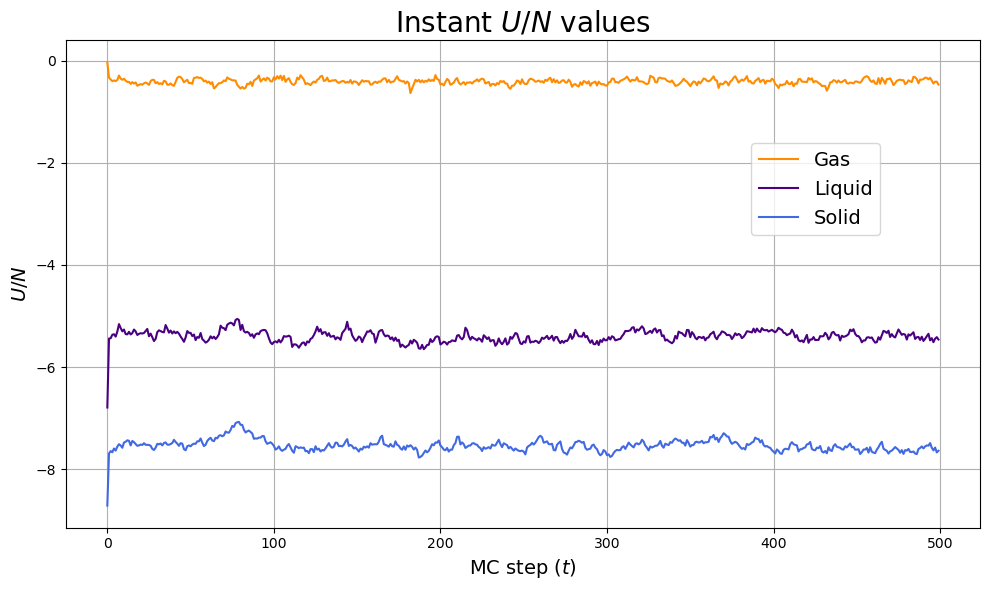

In [27]:
plt.figure(figsize=(10,6))

#Load Gas Data
gasInstant = np.loadtxt('./7.2/Gas/instant.epot')

#Load Liquid Data
liquidInstant = np.loadtxt('./7.2/Liquid/instant.epot')

#Load Solid Data
solidInstant = np.loadtxt('./7.2/Solid/instant.epot')

#plot
plt.plot(gasInstant[:500], color='darkorange', label='Gas')
plt.plot(liquidInstant[:500], color='indigo', label='Liquid')
plt.plot(solidInstant[:500], color='royalblue', label='Solid')

plt.ylabel('$U/N$', fontsize=14)
plt.xlabel('MC step $(t)$', fontsize=14)
plt.legend(fontsize=14, loc=(0.75,0.6))


plt.title('Instant $U/N$ values', fontsize=20)
plt.tight_layout()
plt.grid()
plt.show()

## Assigment

1. Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.

## Autocorrelation

The Autocorrelation of a function $g$ at time $t$ is defined as follows:

$$R(t)= \frac{\left<g(t')g(t'+t)\right>-\left<g(t')\right>\left<g(t'+t)\right>}{\sigma^{2}_{g}}$$

This quantity is $\in[1,-1]$ and describes the correlation of the function $g$ for a given lag $t$, i.e. how much $g$ resembles itself after a time lag.

Most importantly, in many practical situations we observe **exponential tails** in autocorrelation functions, meaning that the autocorrelation decays in an exponential-like fashion:

$$R(t) = \exp\left(-\frac{t}{\tau}\right)$$

This comes quite useful because by fitting $R(t)$ we can get an estimate of $\tau$, the length of decay, i.e. an estimate for how long the process remembers itself. We could use $\tau$ to approximatly estimate how large the blocks should be in my simulations.

In [4]:
from scipy.optimize import curve_fit

# Define the exponential function
def exponential(x, a, b):
    return a * np.exp(-b * x)

tau Gas:  2.10450172518029
tau Liquid:  9.44587523591997
tau Solid:  8.176695269156918


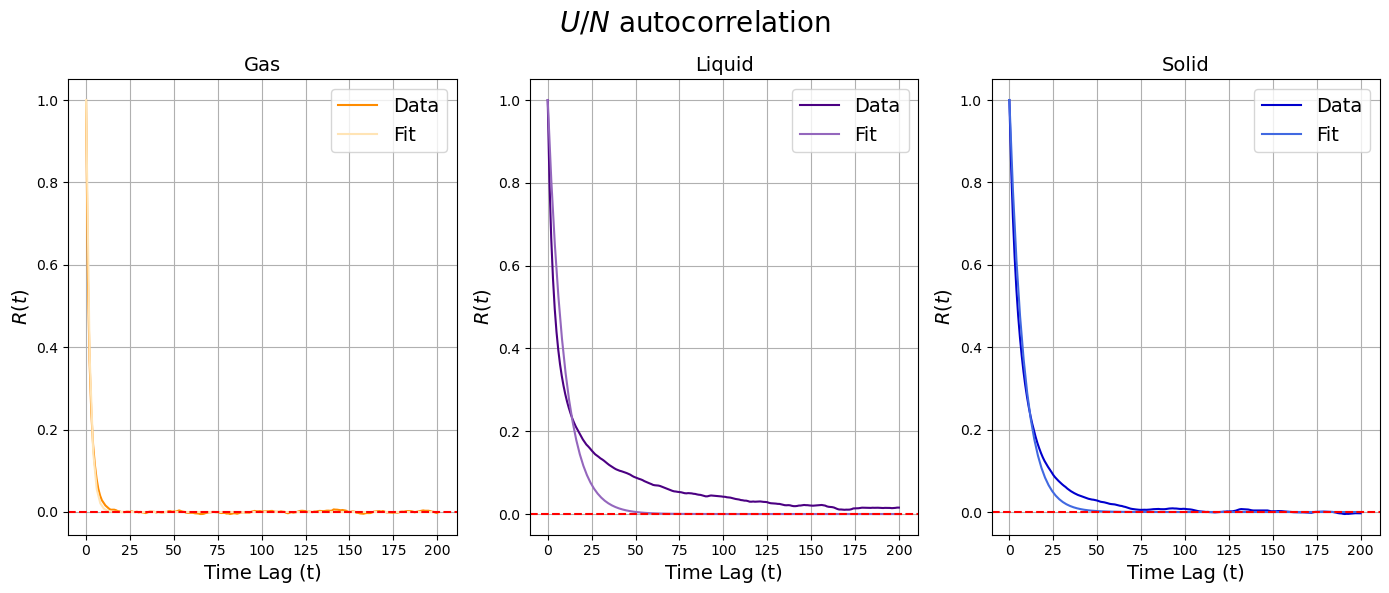

In [5]:
plt.figure(figsize=(14,6))

#define max lag
maxLag = 200

#GAS#

#Load Gas Data
UGas = np.loadtxt('./7.2/Gas/instant.epot')

#compute autocorrelation for gas
acorr = sm.tsa.acf(UGas, nlags = maxLag)

#perform exponential fit
x = np.arange(len(acorr))
popt, pcov = curve_fit(exponential, x, acorr, bounds=([1, 0], [np.inf, np.inf]))
a_fit, b_fit = popt

print('tau Gas: ', 1/b_fit)

# Generate points for the fitted curve
x_fit = np.linspace(0, len(acorr), 100)
y_fit = exponential(x_fit, a_fit, b_fit)

#Open the correct part of the canvas
plt.subplot(1,3,1)

# Plot the data and the fitted curve
plt.plot(x, acorr, label='Data', color='darkorange')
plt.plot(x_fit, y_fit, label='Fit', color='moccasin')

#Final adjustments to the single plot
plt.axhline(0, ls='--', color='red')
plt.ylabel('$R(t)$', fontsize=14)
plt.title('Gas', fontsize=14)
plt.xlabel('Time Lag (t)', fontsize=14)
plt.grid()
plt.legend(fontsize=14)

#LIQUID#

#Load Liquid Data
ULiquid = np.loadtxt('./7.2/Liquid/instant.epot')

#compute autocorrelation for liquid
acorr = sm.tsa.acf(ULiquid, nlags = maxLag)

#perform exponential fit
x = np.arange(len(acorr))
popt, pcov = curve_fit(exponential, x, acorr, bounds=([1, 0], [np.inf, np.inf]))
a_fit, b_fit = popt

print('tau Liquid: ', 1/b_fit)

# Generate points for the fitted curve
x_fit = np.linspace(0, len(acorr), 100)
y_fit = exponential(x_fit, a_fit, b_fit)

#Open the correct part of the canvas
plt.subplot(1,3,2)

# Plot the data and the fitted curve
plt.plot(x, acorr, label='Data', color='indigo')
plt.plot(x_fit, y_fit, label='Fit', color='tab:purple')

#Final adjustments to the single plot
plt.axhline(0, ls='--', color='red')
plt.ylabel('$R(t)$', fontsize=14)
plt.title('Liquid', fontsize=14)
plt.xlabel('Time Lag (t)', fontsize=14)
plt.grid()
plt.legend(fontsize=14)

#SOLID#

#Load solid Data
USolid = np.loadtxt('./7.2/Solid/instant.epot')

#compute autocorrelation for liquid
acorr = sm.tsa.acf(USolid, nlags = maxLag)

#perform exponential fit
x = np.arange(len(acorr))
popt, pcov = curve_fit(exponential, x, acorr, bounds=([1, 0], [np.inf, np.inf]))
a_fit, b_fit = popt

print('tau Solid: ', 1/b_fit)

# Generate points for the fitted curve
x_fit = np.linspace(0, len(acorr), 100)
y_fit = exponential(x_fit, a_fit, b_fit)

#Open the correct part of the canvas
plt.subplot(1,3,3)

# Plot the data and the fitted curve
plt.plot(x, acorr, label='Data', color='mediumblue')
plt.plot(x_fit, y_fit, label='Fit', color='royalblue')

#Final adjustments to the single plot
plt.axhline(0, ls='--', color='red')
plt.ylabel('$R(t)$', fontsize=14)
plt.title('Solid', fontsize=14)
plt.xlabel('Time Lag (t)', fontsize=14)
plt.grid()
plt.legend(fontsize=14)

#final adjustments
plt.suptitle('$U/N$ autocorrelation', fontsize=20)
plt.tight_layout()
plt.show()

tau gas  0.8587975003276254
Tau Liquid  12.958348309464993
Tau solid:  8.038482614460968


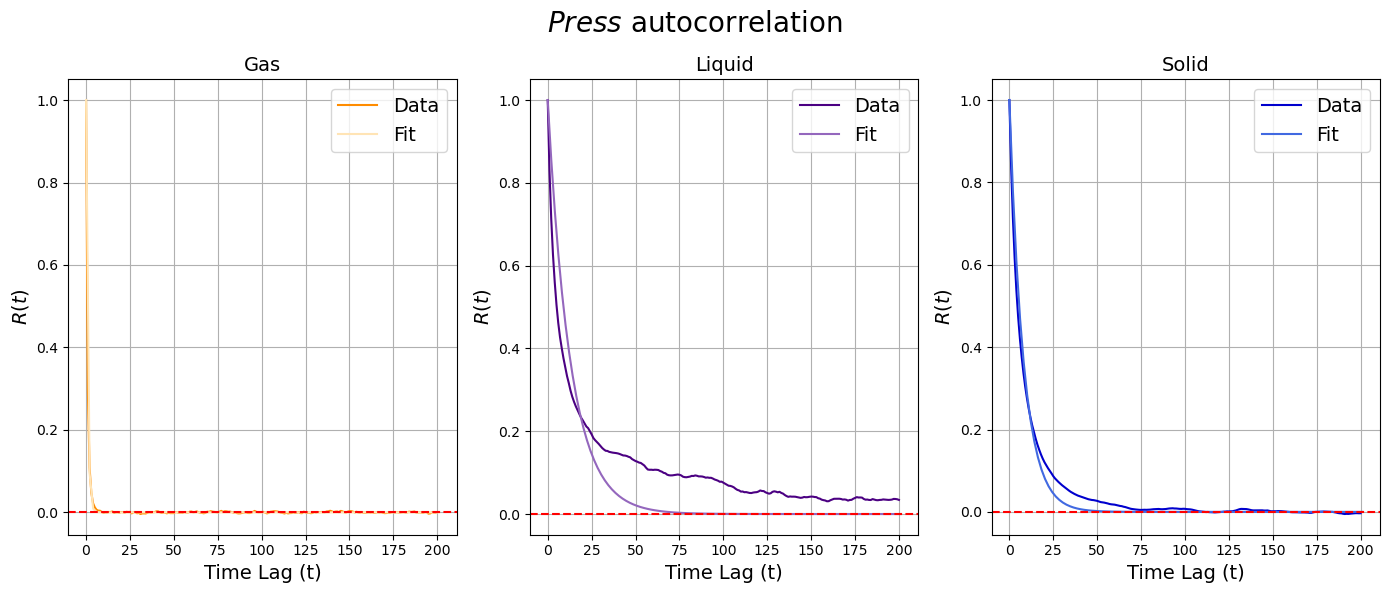

In [28]:
plt.figure(figsize=(14,6))

#define max lag
maxLag = 200

#GAS#

#Load Gas Data
PGas = np.loadtxt('./7.2/Gas/instant.pres')

#compute autocorrelation for gas
acorr = sm.tsa.acf(PGas, nlags = maxLag)

#perform exponential fit
x = np.arange(len(acorr))
popt, pcov = curve_fit(exponential, x, acorr, bounds=([1, 0], [np.inf, np.inf]))
a_fit, b_fit = popt

print('tau gas ', 1/b_fit)

# Generate points for the fitted curve
x_fit = np.linspace(0, len(acorr), 100)
y_fit = exponential(x_fit, a_fit, b_fit)

#Open the correct part of the canvas
plt.subplot(1,3,1)

# Plot the data and the fitted curve
plt.plot(x, acorr, label='Data', color='darkorange')
plt.plot(x_fit, y_fit, label='Fit', color='moccasin')

#Final adjustments to the single plot
plt.axhline(0, ls='--', color='red')
plt.ylabel('$R(t)$', fontsize=14)
plt.title('Gas', fontsize=14)
plt.xlabel('Time Lag (t)', fontsize=14)
plt.grid()
plt.legend(fontsize=14)

#LIQUID#

#Load Liquid Data
PLiquid = np.loadtxt('./7.2/Liquid/instant.pres')

#compute autocorrelation for liquid
acorr = sm.tsa.acf(PLiquid, nlags = maxLag)

#perform exponential fit
x = np.arange(len(acorr))
popt, pcov = curve_fit(exponential, x, acorr, bounds=([1, 0], [np.inf, np.inf]))
a_fit, b_fit = popt

print('Tau Liquid ', 1/b_fit)

# Generate points for the fitted curve
x_fit = np.linspace(0, len(acorr), 100)
y_fit = exponential(x_fit, a_fit, b_fit)

#Open the correct part of the canvas
plt.subplot(1,3,2)

# Plot the data and the fitted curve
plt.plot(x, acorr, label='Data', color='indigo')
plt.plot(x_fit, y_fit, label='Fit', color='tab:purple')

#Final adjustments to the single plot
plt.axhline(0, ls='--', color='red')
plt.ylabel('$R(t)$', fontsize=14)
plt.title('Liquid', fontsize=14)
plt.xlabel('Time Lag (t)', fontsize=14)
plt.grid()
plt.legend(fontsize=14)

#SOLID#

#Load solid Data
PSolid = np.loadtxt('./7.2/Solid/instant.pres')

#compute autocorrelation for liquid
acorr = sm.tsa.acf(PSolid, nlags = maxLag)

#perform exponential fit
x = np.arange(len(acorr))
popt, pcov = curve_fit(exponential, x, acorr, bounds=([1, 0], [np.inf, np.inf]))
a_fit, b_fit = popt

print('Tau solid: ', 1/b_fit)

# Generate points for the fitted curve
x_fit = np.linspace(0, len(acorr), 100)
y_fit = exponential(x_fit, a_fit, b_fit)

#Open the correct part of the canvas
plt.subplot(1,3,3)

# Plot the data and the fitted curve
plt.plot(x, acorr, label='Data', color='mediumblue')
plt.plot(x_fit, y_fit, label='Fit', color='royalblue')

#Final adjustments to the single plot
plt.axhline(0, ls='--', color='red')
plt.ylabel('$R(t)$', fontsize=14)
plt.title('Solid', fontsize=14)
plt.xlabel('Time Lag (t)', fontsize=14)
plt.grid()
plt.legend(fontsize=14)

#final adjustments
plt.suptitle('$Press$ autocorrelation', fontsize=20)
plt.tight_layout()
plt.show()

As expected, the Gas phase has the shorter autocorrelation and this is due to the highly disordered state and weak potential when compared to kinetic energies. On the contrary, the Liquid phase has the greater autocorrelation time but still comparable to the Solid one. 

## Assignment

2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?
    

## Error estimation

First of all i need to define a python function that takes the instant values I already computed through my simulation and computes the error according to the data-blocking tecnique.

In [7]:
def Error (instantQuantity, L):
    nblock = int(instantQuantity.size/L)
    blockAverage = np.zeros(nblock)
    for i in range (nblock):
        blockAverage[i] = np.sum(instantQuantity[i*L:(i+1)*L])/L
    return np.sqrt((np.sum(blockAverage**2) / nblock - (np.sum(blockAverage) / nblock)**2 )/ nblock)

Now, instead of repeat multiple times my simulation, I can simply compute the error as a function of the block size L:

In [9]:
#Array of block sizes
L = np.linspace(10,5000,100, dtype=int)

errUSolid = np.zeros(len(L))
errUGas = np.zeros(len(L))
errULiquid = np.zeros(len(L))
errPSolid = np.zeros(len(L))
errPGas = np.zeros(len(L))
errPLiquid = np.zeros(len(L))

for i in range(len(L)):
    errUSolid[i] = Error(USolid,L[i])
    errULiquid[i] = Error(ULiquid,L[i])
    errUGas[i] = Error(UGas,L[i])
    errPSolid[i] = Error(PSolid,L[i])
    errPGas[i] = Error(PGas,L[i])
    errPLiquid[i] = Error(PLiquid,L[i])



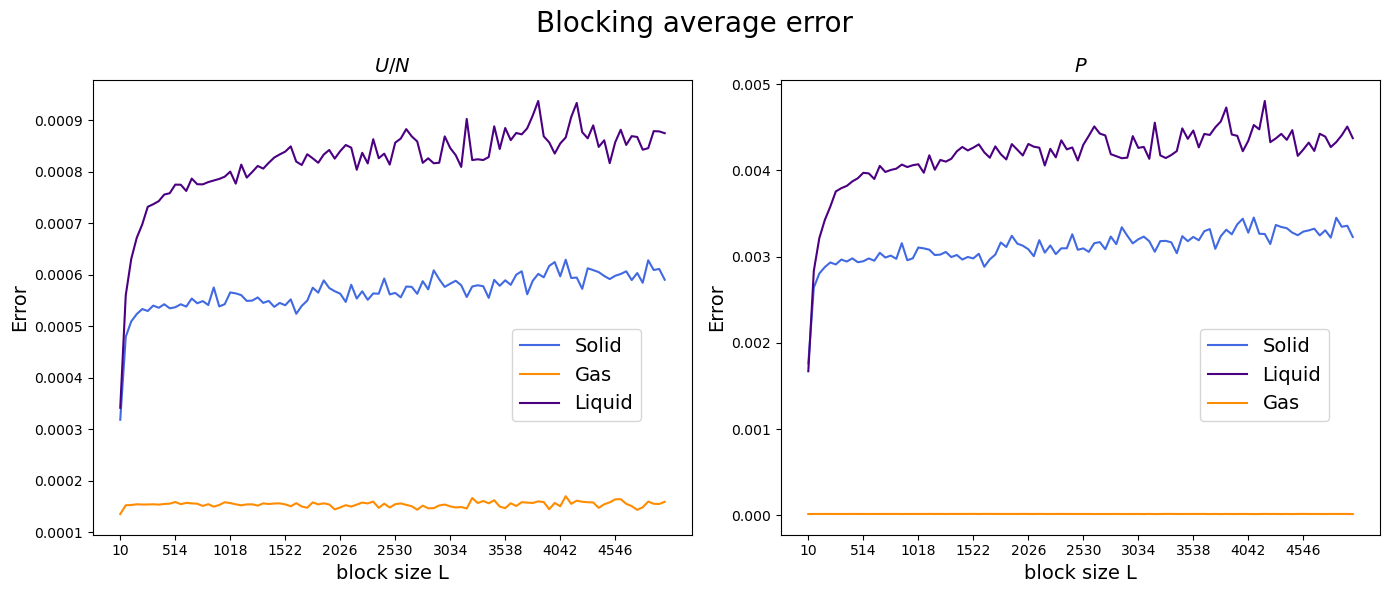

In [26]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)

plt.plot(errUSolid, label='Solid', color='royalblue')
plt.plot(errUGas, label='Gas', color='darkorange')
plt.plot(errULiquid, label='Liquid', color='indigo')

plt.legend(fontsize=14, loc=(.7,.25))
plt.xlabel('block size L', fontsize=14)
plt.xticks(ticks=np.arange(0,len(L),10), labels=L[::10])
plt.ylabel('Error', fontsize = 14)
plt.title('$U/N$', fontsize=14)

plt.subplot(1,2,2)

plt.plot(errPSolid, label='Solid', color='royalblue')
plt.plot(errPLiquid, label='Liquid', color='indigo')
plt.plot(errPGas, label='Gas', color='darkorange')

plt.legend(fontsize=14, loc=(.7,.25))
plt.xlabel('block size L', fontsize=14)
plt.ylabel('Error', fontsize = 14)
plt.xticks(ticks=np.arange(0,len(L),10), labels=L[::10])
plt.title('$P$', fontsize=14)

plt.suptitle('Blocking average error', fontsize=20)
plt.tight_layout()
plt.show()

As clear from the pictures, a block with $L=10^3$ throws is able of properly describing the uncertainty we are looking for, blocks bigger than this size tend to estimate the uncertainty in a similar way. At the same time, $L=10^3$ has been observed to be large enough to break correlations between blocks, as clear from the previous plot. Therefore, the simulation has been carried out with $N=500$ blocks of $L=10^3$ throws, in order to obtain a total of $M=5\cdot10^5$ MC throws per simulation.

# Exercise 7.3

## Assignment

Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the MD/MC code</span>: average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.

## $g(r)$

In the following plot are shown the results of the simulations for the three phases. Each simulation, as previously described, has been carried out with $M=10^5$ and $L=10^3$ throws in each block. I divided the distance $box/2$ into $n_bins=995$ and the error bars are obtained through the last block of the simulation.

In [182]:
gasGr = np.loadtxt('./7.2/Gas/finalGr.dat', usecols=(0,1))
errgasGr = np.loadtxt('./7.2/Gas/finalGr.dat', usecols=(0,2))

liquidGr = np.loadtxt('./7.2/Liquid/finalGr.dat', usecols=(0,1))
errliquidGr = np.loadtxt('./7.2/Liquid/finalGr.dat', usecols=(0,2))

solidGr = np.loadtxt('./7.2/Solid/finalGr.dat', usecols=(0,1))
errsolidGr = np.loadtxt('./7.2/Solid/finalGr.dat', usecols=(0,2))

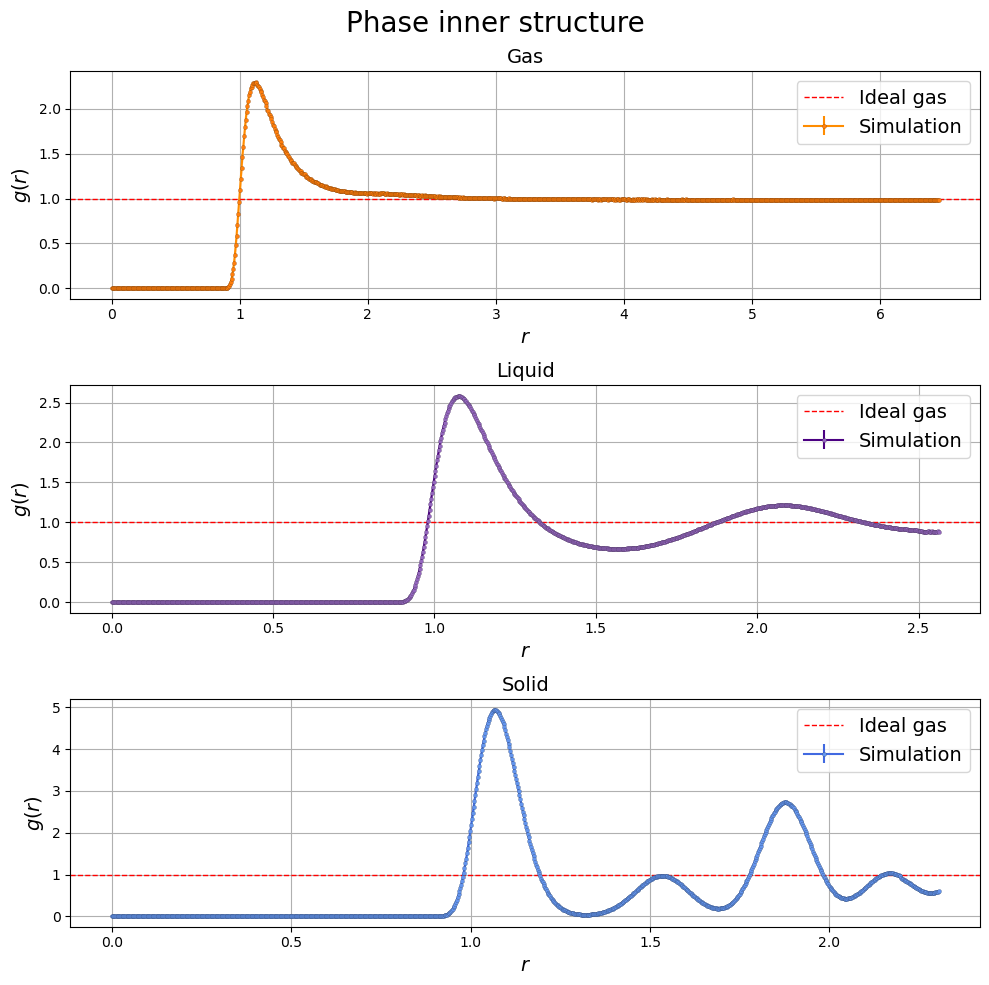

In [189]:
plt.figure(figsize=(10,10))

#GAS#
plt.subplot(3,1,1)
plt.errorbar(gasGr[:,0], gasGr[:,1], yerr=errgasGr[:,1], marker='o',ms=3,mec='black',mfc='tab:orange',mew=0.1, label= 'Simulation', color = 'darkorange', lw =1.5, elinewidth=1.5)
plt.fill_between(gasGr[:,0], gasGr[:,1]-errgasGr[:,1], gasGr[:,1]+errgasGr[:,1],color='bisque')
plt.axhline(1, ls='--', color='red', lw=1, label = 'Ideal gas')
plt.title('Gas', fontsize=14)
plt.ylabel('$g(r)$', fontsize=14)
plt.xlabel('$r$', fontsize=14)
plt.legend(fontsize=14)
plt.grid()

#LIQUID#
plt.subplot(3,1,2)
plt.errorbar(liquidGr[:,0], liquidGr[:,1], yerr=errliquidGr[:,1], marker='o',ms=3,mec='black',mfc='tab:purple',mew=0.1, label= 'Simulation', color = 'indigo', lw =1.5, elinewidth=1.5)
plt.fill_between(liquidGr[:,0], liquidGr[:,1]-errliquidGr[:,1], liquidGr[:,1]+errliquidGr[:,1],color='plum')
plt.axhline(1, ls='--', color='red', lw=1, label = 'Ideal gas')
plt.title('Liquid', fontsize=14)
plt.ylabel('$g(r)$', fontsize=14)
plt.xlabel('$r$', fontsize=14)
plt.legend(fontsize=14)
plt.grid()

#SOLID#
plt.subplot(3,1,3)
plt.errorbar(solidGr[:,0], solidGr[:,1], yerr=errsolidGr[:,1], marker='o',ms=3,mec='black',mfc='cornflowerblue',mew=0.1, label= 'Simulation', color = 'royalblue', lw =1.5, elinewidth=1.5)
plt.fill_between(solidGr[:,0], solidGr[:,1]-errsolidGr[:,1], solidGr[:,1]+errsolidGr[:,1],color='lightskyblue')
plt.axhline(1, ls='--', color='red', lw=1, label = 'Ideal gas')
plt.title('Solid', fontsize=14)
plt.ylabel('$g(r)$', fontsize=14)
plt.xlabel('$r$', fontsize=14)
plt.legend(fontsize=14)
plt.grid()

plt.suptitle('Phase inner structure', fontsize=20)
plt.tight_layout()
plt.show()

# Exercise 7.4

## Assignment

By means of your upgraded MD/MC code, equilibrate and perform MC NVT simulations via a Lennard-Jones model of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in LJ units ...  and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.

## Phase properties

In [181]:
#GasData#
GasPress = np.loadtxt('./7.2/Gas/P.dat', usecols=(0,2))
GasU = np.loadtxt('./7.2/Gas/U.dat', usecols=(0,2))
errGasPress = np.loadtxt('./7.2/Gas/P.dat', usecols=(0,3))
errGasU = np.loadtxt('./7.2/Gas/U.dat', usecols=(0,3))

#LiquidData#
LiquidPress = np.loadtxt('./7.2/Liquid/P.dat', usecols=(0,2))
LiquidU = np.loadtxt('./7.2/Liquid/U.dat', usecols=(0,2))
errLiquidPress = np.loadtxt('./7.2/Liquid/P.dat', usecols=(0,3))
errLiquidU = np.loadtxt('./7.2/Liquid/U.dat', usecols=(0,3))

#SolidData#
SolidPress = np.loadtxt('./7.2/Solid/P.dat', usecols=(0,2))
SolidU = np.loadtxt('./7.2/Solid/U.dat', usecols=(0,2))
errSolidPress = np.loadtxt('./7.2/Solid/P.dat', usecols=(0,3))
errSolidU = np.loadtxt('./7.2/Solid/U.dat', usecols=(0,3))

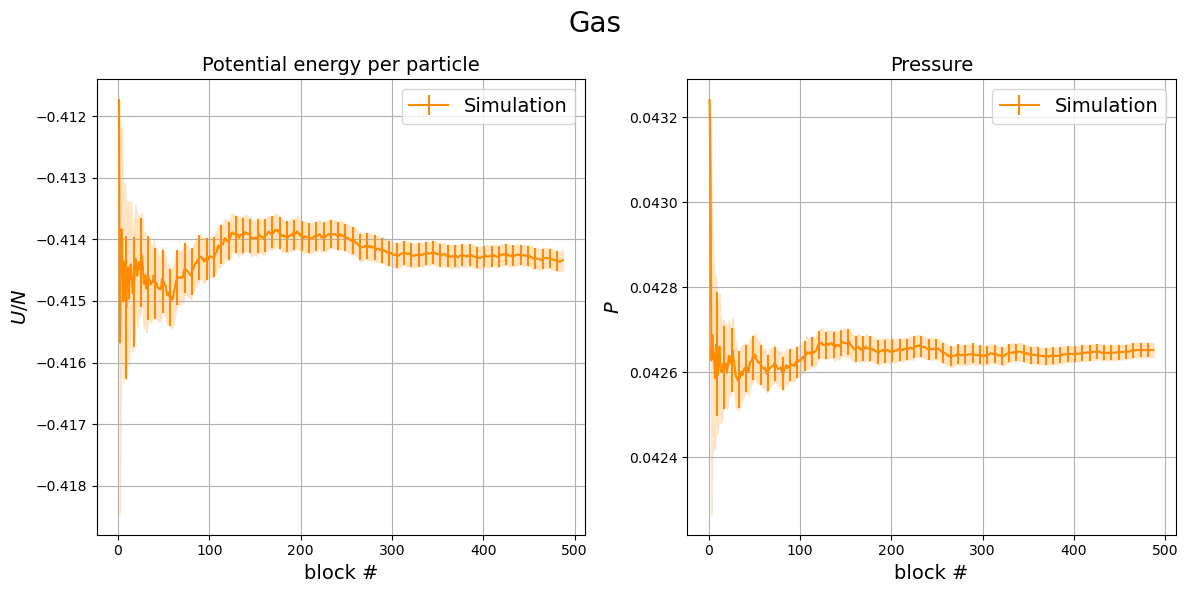

In [135]:
#GAS#

plt.figure(figsize=(12,6))

#Potential Energy per particle
plt.subplot(1,2,1)
plt.errorbar(GasU[:,0], GasU[:,1], yerr=errGasU[:,1],label= 'Simulation', color = 'darkorange', lw =1.5, elinewidth=1.5, errorevery=8)
plt.fill_between(GasU[:,0], GasU[:,1]-errGasU[:,1], GasU[:,1]+errGasU[:,1],color='bisque')
plt.title('Potential energy per particle', fontsize=14)
plt.ylabel('$U/N$', fontsize=14)
plt.xlabel('block #', fontsize=14)
plt.legend(fontsize=14)
plt.grid()

#Pressure
plt.subplot(1,2,2)
plt.errorbar(GasPress[:,0], GasPress[:,1], yerr=errGasPress[:,1], label= 'Simulation', color = 'darkorange', lw =1.5, elinewidth=1.5, errorevery=8)
plt.fill_between(GasPress[:,0], GasPress[:,1]-errGasPress[:,1], GasPress[:,1]+errGasPress[:,1],color='bisque')
plt.title('Pressure', fontsize=14)
plt.ylabel('$P$', fontsize=14)
plt.xlabel('block #', fontsize=14)
plt.legend(fontsize=14)
plt.grid()

plt.suptitle('Gas', fontsize=20)
plt.tight_layout()
plt.show()

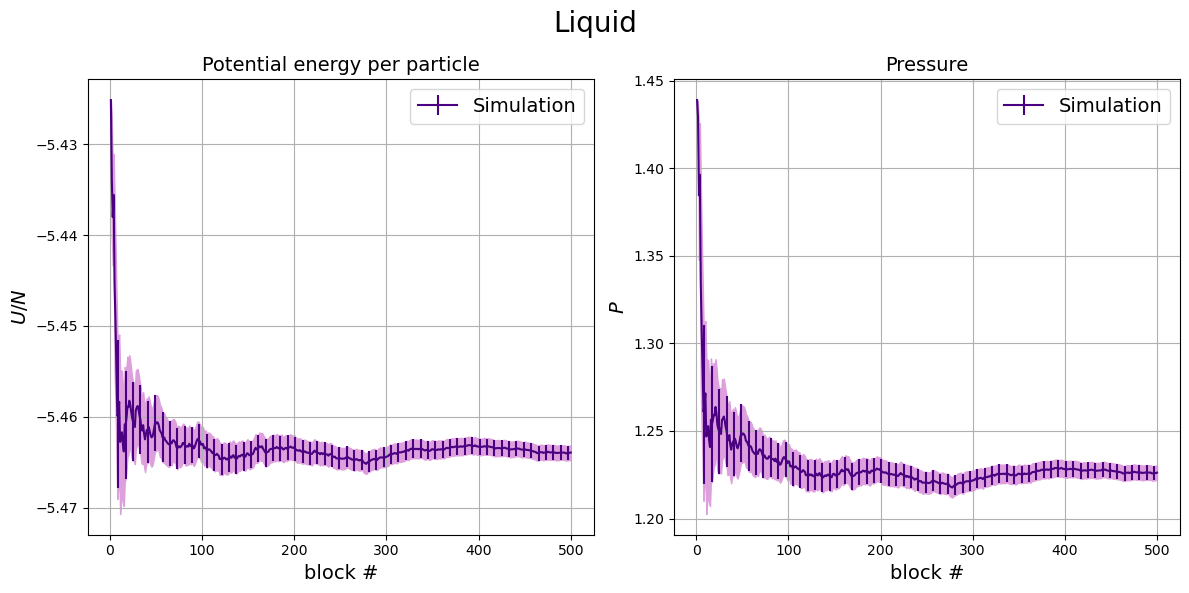

In [158]:
#Liquid#

plt.figure(figsize=(12,6))

#Potential Energy per particle
plt.subplot(1,2,1)
plt.errorbar(LiquidU[:,0], LiquidU[:,1], yerr=errLiquidU[:,1],label= 'Simulation', color = 'indigo', lw =1.5, elinewidth=1.5, errorevery=8)
plt.fill_between(LiquidU[:,0], LiquidU[:,1]-errLiquidU[:,1], LiquidU[:,1]+errLiquidU[:,1],color='plum')
plt.title('Potential energy per particle', fontsize=14)
plt.ylabel('$U/N$', fontsize=14)
plt.xlabel('block #', fontsize=14)
plt.legend(fontsize=14)
plt.grid()

#Pressure
plt.subplot(1,2,2)
plt.errorbar(LiquidPress[:,0], LiquidPress[:,1], yerr=errLiquidPress[:,1], label= 'Simulation', color = 'indigo', lw =1.5, elinewidth=1.5, errorevery=8)
plt.fill_between(LiquidPress[:,0], LiquidPress[:,1]-errLiquidPress[:,1], LiquidPress[:,1]+errLiquidPress[:,1],color='plum')
plt.title('Pressure', fontsize=14)
plt.ylabel('$P$', fontsize=14)
plt.xlabel('block #', fontsize=14)
plt.legend(fontsize=14)
plt.grid()

plt.suptitle('Liquid', fontsize=20)
plt.tight_layout()
plt.show()

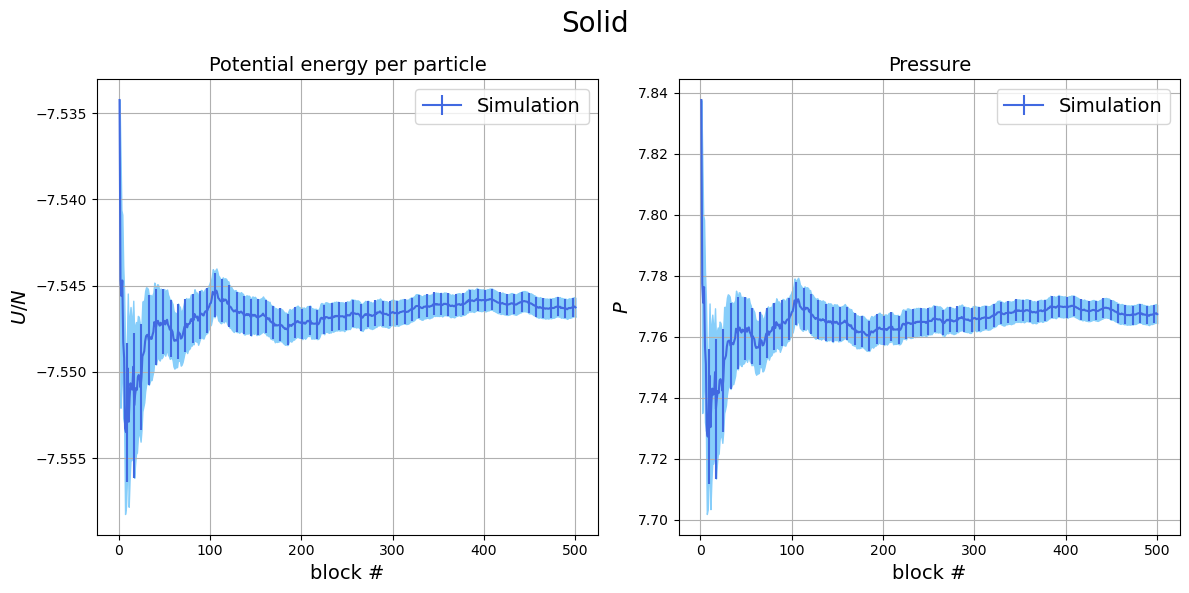

In [155]:
#Solid#

plt.figure(figsize=(12,6))

#Potential Energy per particle
plt.subplot(1,2,1)
plt.errorbar(SolidU[:,0], SolidU[:,1], yerr=errSolidU[:,1],label= 'Simulation', color = 'royalblue', lw =1.5, elinewidth=1.5, errorevery=8)
plt.fill_between(SolidU[:,0], SolidU[:,1]-errSolidU[:,1], SolidU[:,1]+errSolidU[:,1],color='lightskyblue')
plt.title('Potential energy per particle', fontsize=14)
plt.ylabel('$U/N$', fontsize=14)
plt.xlabel('block #', fontsize=14)
plt.legend(fontsize=14)
plt.grid()

#Pressure
plt.subplot(1,2,2)
plt.errorbar(SolidPress[:,0], SolidPress[:,1], yerr=errSolidPress[:,1], label= 'Simulation', color = 'royalblue', lw =1.5, elinewidth=1.5, errorevery=8)
plt.fill_between(SolidPress[:,0], SolidPress[:,1]-errSolidPress[:,1], SolidPress[:,1]+errSolidPress[:,1],color='lightskyblue')
plt.title('Pressure', fontsize=14)
plt.ylabel('$P$', fontsize=14)
plt.xlabel('block #', fontsize=14)
plt.legend(fontsize=14)
plt.grid()

plt.suptitle('Solid', fontsize=20)
plt.tight_layout()
plt.show()

For the equilibrations needed in the **MD simulations** i used the study performed in `LSN_4`. Here, i report the results of this study:

- **Liquid phase**: Initial temp: 1.98, Number of equilibration moves: $25\cdot10^3$
- **Solid phase**: Initial temp: 1.54, Number of equilibration moves: $25\cdot10^3$
- **Gas phase**: Initial temp: 0.96, Number of equilibration moves: $10^5$

In [184]:
gasGrMD = np.loadtxt('./7.2/Gas/finalGrMD.dat', usecols=(0,1))
errgasGrMD = np.loadtxt('./7.2/Gas/finalGrMD.dat', usecols=(0,2))

liquidGrMD = np.loadtxt('./7.2/Liquid/finalGrMD.dat', usecols=(0,1))
errliquidGrMD = np.loadtxt('./7.2/Liquid/finalGrMD.dat', usecols=(0,2))

solidGrMD = np.loadtxt('./7.2/Solid/finalGrMD.dat', usecols=(0,1))
errsolidGrMD = np.loadtxt('./7.2/Solid/finalGrMD.dat', usecols=(0,2))

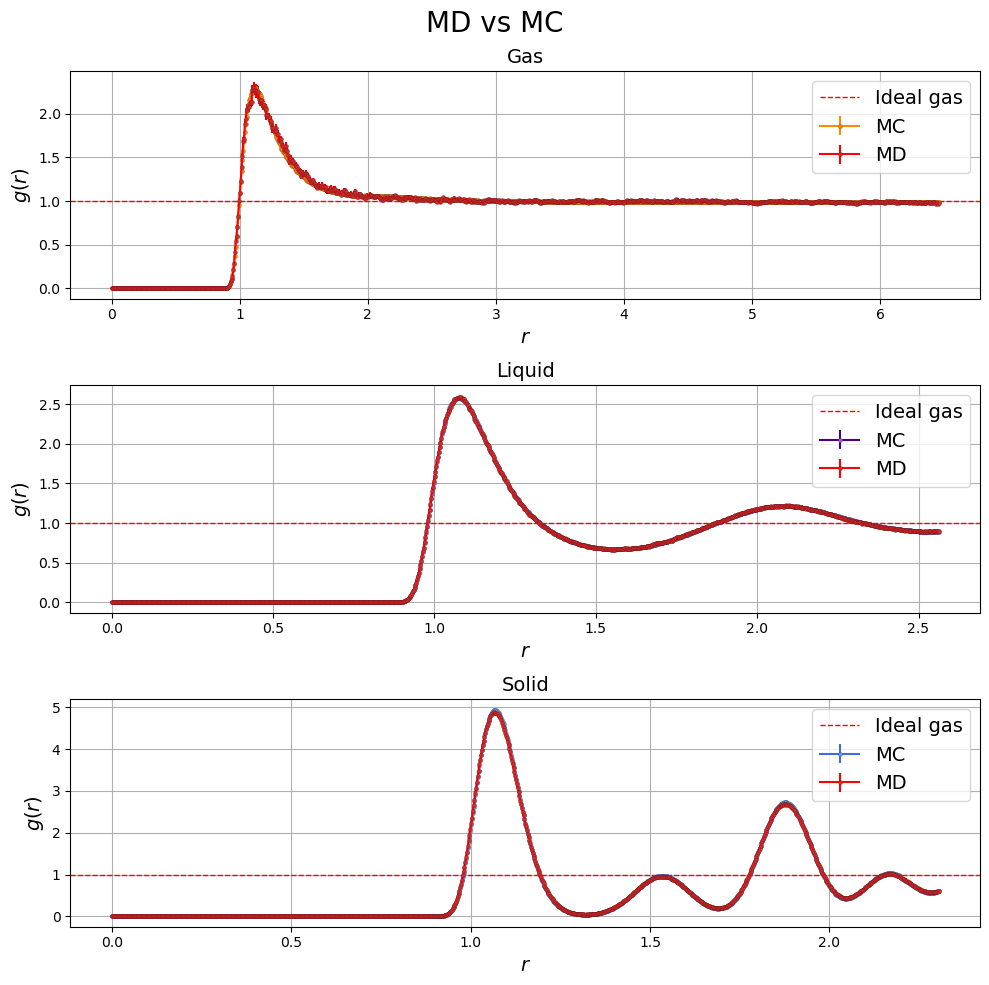

In [187]:
plt.figure(figsize=(10,10))

#GAS#
plt.subplot(3,1,1)
plt.errorbar(gasGr[:,0], gasGr[:,1], yerr=errgasGr[:,1], marker='o',ms=3,mec='black',mfc='tab:orange',mew=0.1, label= 'MC', color = 'darkorange', lw =1.5, elinewidth=1.5)
plt.errorbar(gasGrMD[:,0], gasGrMD[:,1], yerr=errgasGrMD[:,1], marker='o',ms=3,mec='black',mfc='tab:red',mew=0.1, label= 'MD', color = 'red', lw =1.5, elinewidth=1.5)
plt.axhline(1, ls='--', color='red', lw=1, label = 'Ideal gas')
plt.title('Gas', fontsize=14)
plt.ylabel('$g(r)$', fontsize=14)
plt.xlabel('$r$', fontsize=14)
plt.legend(fontsize=14)
plt.grid()

#LIQUID#
plt.subplot(3,1,2)
plt.errorbar(liquidGr[:,0], liquidGr[:,1], yerr=errliquidGr[:,1], marker='o',ms=3,mec='black',mfc='tab:purple',mew=0.1, label= 'MC', color = 'indigo', lw =1.5, elinewidth=1.5)
plt.errorbar(liquidGrMD[:,0], liquidGrMD[:,1], yerr=errliquidGrMD[:,1], marker='o',ms=3,mec='black',mfc='tab:red',mew=0.1, label= 'MD', color = 'red', lw =1.5, elinewidth=1.5)
plt.axhline(1, ls='--', color='red', lw=1, label = 'Ideal gas')
plt.title('Liquid', fontsize=14)
plt.ylabel('$g(r)$', fontsize=14)
plt.xlabel('$r$', fontsize=14)
plt.legend(fontsize=14)
plt.grid()

#SOLID#
plt.subplot(3,1,3)
plt.errorbar(solidGr[:,0], solidGr[:,1], yerr=errsolidGr[:,1], marker='o',ms=3,mec='black',mfc='cornflowerblue',mew=0.1, label= 'MC', color = 'royalblue', lw =1.5, elinewidth=1.5)
plt.errorbar(solidGrMD[:,0], solidGrMD[:,1], yerr=errsolidGrMD[:,1], marker='o',ms=3,mec='black',mfc='tab:red',mew=0.1, label= 'MD', color = 'red', lw =1.5, elinewidth=1.5)
plt.axhline(1, ls='--', color='red', lw=1, label = 'Ideal gas')
plt.title('Solid', fontsize=14)
plt.ylabel('$g(r)$', fontsize=14)
plt.xlabel('$r$', fontsize=14)
plt.legend(fontsize=14)
plt.grid()


plt.suptitle('MD vs MC', fontsize=20)
plt.tight_layout()
plt.show()